In [1]:
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [2]:
PATH2RAW = '/Users/julia/Desktop/raw_data'

In [3]:
data_file = pd.read_table(os.path.join(PATH2RAW, '16.03.2019-18.37.32.dat',), delimiter=r"\s+", decimal=',', skiprows=1)
data_file

,Time,T_set1,T_set2,T_set_3,T_set4,N_cycle,Phase,T1,R1,T2,R2,T3,R3,T4,R4
0,0.26,100.0000,150.0000,150.0000,150.0000,1,3,6.796659,1017631.0,16.99999,3738238.0,13.96551,364169200.0,16.15645,138198600.0
1,0.37,100.0000,150.0000,150.0000,150.0000,1,3,9.633535,918182.3,21.88888,3400904.0,19.02298,247933100.0,20.91836,86560560.0
2,0.47,100.0000,150.0000,150.0000,150.0000,1,3,12.234000,860797.7,26.11109,2986317.0,23.39079,161275500.0,25.45350,68144780.0
3,0.58,100.0000,150.0000,150.0000,150.0000,1,3,14.834490,786113.9,30.77778,2758753.0,27.98851,128344500.0,29.76191,50721460.0
4,0.67,100.0000,150.0000,150.0000,150.0000,1,3,17.198540,742525.8,34.77779,2465998.0,32.35632,95678140.0,34.07031,42841860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863994,86399.75,113.3333,161.6667,161.6667,161.6667,1440,6,183.392400,714600.3,219.00000,1205966.0,224.77010,4521251.0,219.78460,2173683.0
863995,86399.84,110.6667,159.3333,159.3333,159.3333,1440,6,181.264700,767884.6,217.44440,1236777.0,222.93100,4664762.0,218.19730,2253108.0
863996,86399.95,108.0000,157.0000,157.0000,157.0000,1440,6,179.137000,806724.6,215.88890,1291906.0,221.09190,4906399.0,216.15640,2326712.0
863997,86400.04,105.3333,154.6667,154.6667,154.6667,1440,6,177.245800,867430.8,214.11110,1328245.0,219.02290,5094415.0,214.34240,2423433.0


In [5]:
data_file = data_file.rename(columns={'Time': 'Время, сек'})
data_file = data_file.rename(columns={'T_set1': 'Температура set1, ºС '})
data_file = data_file.rename(columns={'T_set2': 'Температура set2,  ºС '})
data_file = data_file.rename(columns={'T_set_3': 'Температура set3,  ºС '})
data_file = data_file.rename(columns={'T_set4': 'Температура set4,  ºС '})

data_file = data_file.rename(columns={'N_cycle': 'Номер цикла'})

data_file = data_file.rename(columns={'T1': 'Температура real1,  ºС '})
data_file = data_file.rename(columns={'T2': 'Температура real2,  ºС '})
data_file = data_file.rename(columns={'T3': 'Температура real3,  ºС '})
data_file = data_file.rename(columns={'T4': 'Температура real4,  ºС '})

data_file = data_file.rename(columns={'R1': 'Сопротивление real1,  Ом'})
data_file = data_file.rename(columns={'R2': 'Сопротивление real2,  Ом'})
data_file = data_file.rename(columns={'R3': 'Сопротивление real3,  Ом'})
data_file = data_file.rename(columns={'R4': 'Сопротивление real4,  Ом'})




data_file = data_file.rename(columns={'Phase': 'Процесс'})
data_file

,"Время, сек","Температура set1, ºС","Температура set2, ºС","Температура set3, ºС","Температура set4, ºС",Номер цикла,Процесс,"Температура real1, ºС","Сопротивление real1, Ом","Температура real2, ºС","Сопротивление real2, Ом","Температура real3, ºС","Сопротивление real3, Ом","Температура real4, ºС","Сопротивление real4, Ом"
0,0.26,100.0000,150.0000,150.0000,150.0000,1,3,6.796659,1017631.0,16.99999,3738238.0,13.96551,364169200.0,16.15645,138198600.0
1,0.37,100.0000,150.0000,150.0000,150.0000,1,3,9.633535,918182.3,21.88888,3400904.0,19.02298,247933100.0,20.91836,86560560.0
2,0.47,100.0000,150.0000,150.0000,150.0000,1,3,12.234000,860797.7,26.11109,2986317.0,23.39079,161275500.0,25.45350,68144780.0
3,0.58,100.0000,150.0000,150.0000,150.0000,1,3,14.834490,786113.9,30.77778,2758753.0,27.98851,128344500.0,29.76191,50721460.0
4,0.67,100.0000,150.0000,150.0000,150.0000,1,3,17.198540,742525.8,34.77779,2465998.0,32.35632,95678140.0,34.07031,42841860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863994,86399.75,113.3333,161.6667,161.6667,161.6667,1440,6,183.392400,714600.3,219.00000,1205966.0,224.77010,4521251.0,219.78460,2173683.0
863995,86399.84,110.6667,159.3333,159.3333,159.3333,1440,6,181.264700,767884.6,217.44440,1236777.0,222.93100,4664762.0,218.19730,2253108.0
863996,86399.95,108.0000,157.0000,157.0000,157.0000,1440,6,179.137000,806724.6,215.88890,1291906.0,221.09190,4906399.0,216.15640,2326712.0
863997,86400.04,105.3333,154.6667,154.6667,154.6667,1440,6,177.245800,867430.8,214.11110,1328245.0,219.02290,5094415.0,214.34240,2423433.0


In [5]:
data_file['T_set1'].min()

100.0

In [6]:
data_file['T_set2'].min()

150.0

In [7]:
data_file['T_set_3'].min()

150.0

In [79]:
np.array(data_file['T_set4'][0:550])

array([150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 150.    , 150.    , 150.    , 150.    ,
       150.    , 150.    , 151.    , 152.    , 153.    , 154.    ,
       155.    , 156.    , 157.    , 158.    , 159.    , 160.    ,
       161.    , 162.    , 163.    , 164.    , 165.    , 166.    ,
       167.    , 168.    , 169.    , 170.    , 171.    , 172.    ,
       173.    , 174.    , 175.    , 176.    , 177.    , 178.    ,
       179.    , 180.    , 181.    , 182.    , 183.    , 184.    ,
       185.    , 186.    , 187.    , 188.    , 189.    , 190. 

In [211]:
# Настройка размера и разрешения графика
config = {
    'displayModeBar': False,
    'showTips': False,
    'staticPlot': False
}

x = np.linspace(0, 60, 600)

# Построение графика
trace = go.Scatter(x=x, y=np.array(data_file['T_set2'][0:600]),marker=dict(size=5, color='teal'))

layout = go.Layout(
    # Фон белый
    plot_bgcolor='white',
    # Все тексты и подписи тоже чёрные
    font=dict(color='black'),
    # Оси чёрные
    xaxis=dict(
        title='Время, сек',
        color='black',
        gridcolor='lightgray',
        gridwidth=1,
        titlefont=dict(size=20, family="Times New Roman, sans-serif"),
        tickmode='linear',
        tick0=0,
        dtick=5
    ),
    yaxis=dict(
        title='Температура, ºС ',
        color='black',
        gridcolor='lightgray',
        gridwidth=1,
        titlefont=dict(size=20, family="Times New Roman, sans-serif")
    ),
    shapes=[
        # Линия 1
        dict(
            type='line',
            x0=5,
            y0=min(np.array(data_file['T_set2'][0:600])),
            x1=40,
            y1=max(np.array(data_file['T_set2'][0:600])),
            line=dict(
                color='red',
                width=2
            )
        ),
        # Линия 2
        dict(
            type='line',
            x0=45,
            y0=max(np.array(data_file['T_set2'][0:600])),
            x1=60,
            y1=min(np.array(data_file['T_set2'][0:600])),
            line=dict(
                color='blue',
                width=2
            )
        )
    ]
)

fig = go.Figure(data=[trace], layout=layout)

fig.show(config=config)


In [192]:
import plotly.graph_objs as go

# Настройка размера и разрешения графика
config = {
    'displayModeBar': False,
    'showTips': False,
    'staticPlot': False
}

x = np.linspace(0, 60, 600)

# Построение графика
trace = go.Scatter(x=x, y=np.array(data_file['T_set2'][0:600]),marker=dict(size=5, color='coral'))

layout = go.Layout(
    # Фон белый
    plot_bgcolor='white',
    # Все тексты и подписи тоже чёрные
    font=dict(color='black'),
    # Оси чёрные
    xaxis=dict(
        title='Время, сек',
        color='black',
        gridcolor='lightgray',
        gridwidth=1,
        titlefont=dict(size=20, family="Times New Roman, sans-serif"),
        tickmode='linear',
        tick0=0,
        dtick=5
    ),
    yaxis=dict(
        title='Температура, ºС ',
        color='black',
        gridcolor='lightgray',
        gridwidth=1,
        titlefont=dict(size=20, family="Times New Roman, sans-serif")
    ),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show(config=config)


In [171]:
import plotly.graph_objs as go

# Настройка размера и разрешения графика
config = {
    'displayModeBar': False,
    'showTips': False,
    'staticPlot': False
}

x = np.linspace(0, 60, 500)

# Построение графика
trace = go.Scatter(x=x, y=np.array(data_file['R1'][0:550]/1000),marker=dict(size=5, color='mediumseagreen'))


layout = go.Layout(
    # Фон белый
    plot_bgcolor='white',
    # Все тексты и подписи тоже чёрные
    font=dict(color='black'),
    # Оси чёрные
    xaxis=dict(title='Время, сек', color='black', gridcolor='lightgray', gridwidth=1),
    yaxis=dict(title='Температура, ºС ', color='black', gridcolor='lightgray', gridwidth=1),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show(config=config)



In [162]:
import plotly.graph_objs as go

# Настройка размера и разрешения графика
config = {
    'displayModeBar': False,
    'showTips': False,
    'staticPlot': False
}

x = np.linspace(0, 60, 600)

# Построение графика
trace1 = go.Scatter(x=x, y=np.array(data_file['T1'][0:600]),marker=dict(size=5, color='coral'))


# Построение графика для Метод анализа весов нейронной сети
trace2 = go.Scatter(x=x, y=np.array(data_file['R1'][0:600]/1000),marker=dict(size=5, color='mediumseagreen'))


trace3 = go.Scatter(x=x, y=np.array(data_file['T_set1'][0:600]),marker=dict(size=5, color='royalblue'))

layout = go.Layout(
    # Фон белый
    plot_bgcolor='white',
    # Все тексты и подписи тоже чёрные
    font=dict(color='black'),
    # Оси чёрные
    xaxis=dict(title='Время, сек', color='black', gridcolor='lightgray', gridwidth=1),
    yaxis=dict(title='Температура, ºС ', color='black', gridcolor='lightgray', gridwidth=1),
)

data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)

fig.show(config=config)



In [185]:
import plotly.graph_objects as go

# задаем данные для гистограммы
data = {
    'Водород': [[1, 5, 9], [200, 100, 40]],
    'Пропан': [[3,7, 11,], [200, 100, 40]],
    'Воздух': [[0, 2, 4, 6, 8, 10,], [240] * 6]
}

fig = go.Figure()

colors = {
    'Водород': 'royalblue',
    'Пропан': 'coral',
    'Воздух': 'skyblue'
}

for gas, values in data.items():
    fig.add_trace(go.Bar(x=values[0], y=values[1], name=gas, marker=dict(color=colors[gas])))

fig.update_layout(
    barmode='stack',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        rangemode='tozero',
        title='Время, час',
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        titlefont=dict(size=20, family="Times New Roman, sans-serif")
    ),
    yaxis=dict(
        range=[0, 240],
        title='Концентрация, ppm',
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        titlefont=dict(size=20, family="Times New Roman, sans-serif")
    ),
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top',
        font=dict(size=20, family="Times New Roman, sans-serif")
        
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)

fig.show()


In [180]:
import plotly.graph_objects as go

# задаем данные для гистограммы
data = {'Водород': [[1, 5, 9], [200, 100, 40]],
        'Пропан': [[3,7, 11,], [200, 100, 40]],
        'Воздух': [[0, 2, 4, 6, 8, 10,], [240] * 6]}

# создаем гистограмму
fig = go.Figure()

# добавляем данные для каждого типа газа
for gas, values in data.items():
    fig.add_trace(go.Bar(x=values[0], y=values[1], name=gas))

# задаем параметры осей и заголовок графика
fig.update_layout(xaxis_title='Время, час', yaxis_title='Концентрация, ppm')

# задаем диапазон значений для осей x и y
fig.update_xaxes(range=[0, 12])
fig.update_yaxes(range=[0, 240])

# устанавливаем белый фон и черный цвет текста и сетки
fig.update_layout(
    plot_bgcolor='white',  # установка фона на белый цвет
    paper_bgcolor='white',  # установка фона на белый цвет
    font=dict(color='black'),  # установка цвета текста на черный цвет
    xaxis=dict(showgrid=True, gridcolor='lightgray', linecolor='black'),  # установка цвета линий и сетки оси x
    yaxis=dict(showgrid=True, gridcolor='lightgray', linecolor='black'),  # установка цвета линий и сетки оси y
)

fig.show()

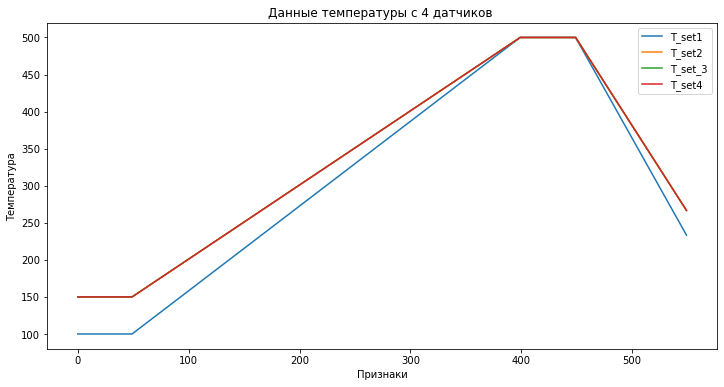

In [21]:
fig, ax = plt.subplots()
#ax.plot(np.array(data_file['T_set2'][500:2800]), label = 'set T', color='salmon')
#
fig.set_figwidth(12)
fig.set_figheight(6)
ax.plot(np.array(data_file['T_set1'][0:550]), label =  'T_set1 ')
ax.plot(np.array(data_file['T_set2'][0:550]), label =  'T_set2')
ax.plot(np.array(data_file['T_set_3'][0:550]), label =  'T_set_3')
ax.plot(np.array(data_file['T_set4'][0:550]), label =  'T_set4 ')
#plt.plot( np.array(data_file['R1'][0:550]/1000), label = 'R1 ', linewidth=2.0, color='aqua')
#plt.plot( np.array(data_file['R2'][0:550])/1000, label = 'R2 ', linewidth=2.0, color='red')
#plt.plot( np.array(data_file['R3'][0:550])/1000, label = 'R3 ', linewidth=2.0, color='salmon')
#plt.plot( np.array(data_file['R4'][0:550])/1000, label = 'R4 ', linewidth=2.0, color='blue')


#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R1'][100:431599]/1000), label = 'R1 ', linewidth=2.0, color='aqua')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R2'][100:431599])/1000, label = 'R2 ', linewidth=2.0, color='red')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R3'][100:431599])/1000, label = 'R3 ', linewidth=2.0, color='salmon')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R4'][100:431599])/1000, label = 'R4 ', linewidth=2.0, color='blue')

plt.xlabel("Признаки")
plt.ylabel("Температура")
plt.title("Данные температуры с 4 датчиков ")
plt.legend()


In [69]:
T1_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_T1_30_num6.csv'), index_col=0)
T2_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_T2_30_num6.csv'), index_col=0)
T3_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_T3_30_num6.csv'), index_col=0)
T4_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_T4_30_num6.csv'), index_col=0)

T1_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T1_30_num9.csv'), index_col=0)
T2_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T2_30_num9.csv'), index_col=0)
T3_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T3_30_num9.csv'), index_col=0)
T4_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T4_30_num9.csv'), index_col=0)

In [153]:
R1_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_R1_30_num6.csv'), index_col=0)
R2_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_R2_30_num6.csv'), index_col=0)
R3_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_R3_30_num6.csv'), index_col=0)
R4_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_R4_30_num6.csv'), index_col=0)

R1_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T1_30_num9.csv'), index_col=0)
R2_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T2_30_num9.csv'), index_col=0)
R3_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T3_30_num9.csv'), index_col=0)
R4_data_h2 = pd.read_csv(os.path.join(PATH2CROP_H2, '03.04.2019_T4_30_num9.csv'), index_col=0)

In [ ]:
import plotly.graph_objs as go

# Настройка размера и разрешения графика
config = {
    'displayModeBar': False,
    'showTips': False,
    'staticPlot': False
}

x = np.linspace(0, 60, 600)

# Построение графика
trace = go.Scatter(x=x, y=np.array(data_file['T_set2'][0:600]),marker=dict(size=5, color='coral'))

layout = go.Layout(
    # Фон белый
    plot_bgcolor='white',
    # Все тексты и подписи тоже чёрные
    font=dict(color='black'),
    # Оси чёрные
    xaxis=dict(title='Время, сек', color='black', gridcolor='lightgray', gridwidth=1),
    yaxis=dict(title='Температура, ºС ', color='black', gridcolor='lightgray', gridwidth=1),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show(config=config)



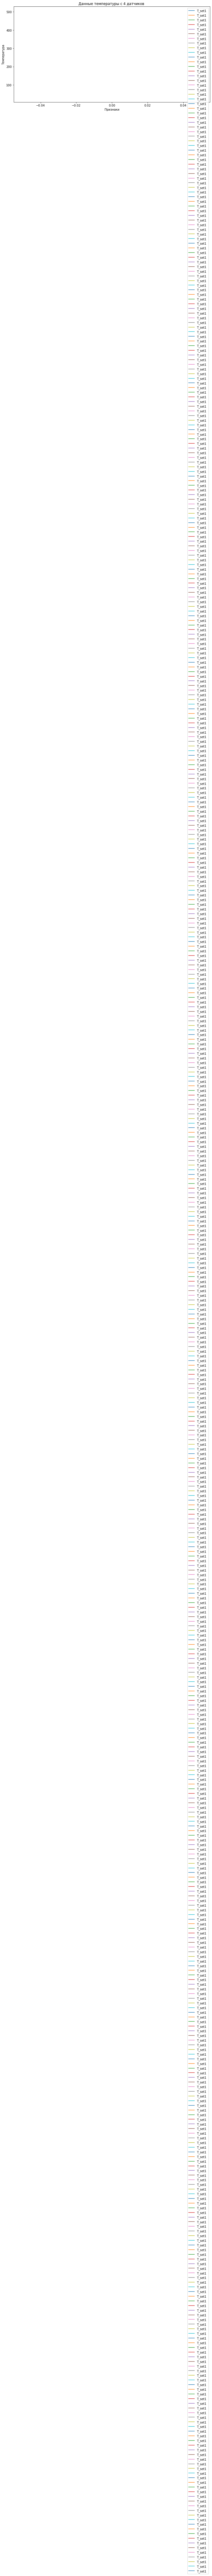

In [44]:
fig, ax = plt.subplots()
#ax.plot(np.array(data_file['T_set2'][500:2800]), label = 'set T', color='salmon')
#
x = np.linspace(0, 551, 1)
fig.set_figwidth(12)
fig.set_figheight(6)
plt.plot(x, np.array(T1_data_propane.iloc[[0]]), label =  'T_set1 ')
#plt.plot(np.array(T2_data_propane.iloc[[0]]), label =  'T_set2')
#plt.plot(np.array(T3_data_propane.iloc[[0]]), label =  'T_set_3')
#plt.plot(np.array(T4_data_propane.iloc[[0]]), label =  'T_set4 ')
#plt.plot( np.array(data_file['R1'][0:550]/1000), label = 'R1 ', linewidth=2.0, color='aqua')
#plt.plot( np.array(data_file['R2'][0:550])/1000, label = 'R2 ', linewidth=2.0, color='red')
#plt.plot( np.array(data_file['R3'][0:550])/1000, label = 'R3 ', linewidth=2.0, color='salmon')
#plt.plot( np.array(data_file['R4'][0:550])/1000, label = 'R4 ', linewidth=2.0, color='blue')


#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R1'][100:431599]/1000), label = 'R1 ', linewidth=2.0, color='aqua')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R2'][100:431599])/1000, label = 'R2 ', linewidth=2.0, color='red')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R3'][100:431599])/1000, label = 'R3 ', linewidth=2.0, color='salmon')
#plt.plot(np.array(data_file['Time'][100:431599]/10), np.array(data_file['R4'][100:431599])/1000, label = 'R4 ', linewidth=2.0, color='blue')

plt.xlabel("Признаки")
plt.ylabel("Температура")
plt.title("Данные температуры с 4 датчиков ")
plt.legend()



In [67]:
# let't check root folder of prepared data
PATH2CROP_PROPANE = '/Users/julia/Desktop/propane'
PATH2CROP_H2 = '/Users/julia/Desktop/h2'
os.listdir(PATH2CROP_H2)

['26.03.2019_R2_950_num14.csv',
 '28.03.2019_T3_950_num14.csv',
 '23.03.2019_T1_1600_num2.csv',
 '03.04.2019_R1_30_num33.csv',
 '25.03.2019_T4_100_num22.csv',
 '03.04.2019_R1_30_num27.csv',
 '16.03.2019_T3_1600_num2.csv',
 '18.03.2019_R2_1600_num2.csv',
 '03.04.2019_R1_30_num3.csv',
 '24.03.2019_T1_470_num6.csv',
 '23.03.2019_T1_800_num18.csv',
 '18.03.2019_R2_800_num18.csv',
 '26.03.2019_T2_470_num6.csv',
 '16.03.2019_T3_800_num18.csv',
 '11.04.2019_R4_200_num6.csv',
 '04.04.2019_R3_30_num9.csv',
 '24.03.2019_T4_470_num18.csv',
 '18.03.2019_R3_400_num10.csv',
 '16.03.2019_T2_400_num10.csv',
 '25.03.2019_R2_950_num2.csv',
 '11.04.2019_R3_200_num6.csv',
 '23.03.2019_T1_400_num22.csv',
 '16.03.2019_T3_400_num22.csv',
 '18.03.2019_R2_400_num22.csv',
 '11.04.2019_T3_200_num20.csv',
 '27.03.2019_R1_950_num2.csv',
 '11.04.2019_R3_450_num3.csv',
 '28.03.2019_R1_950_num2.csv',
 '03.04.2019_R3_30_num15.csv',
 '11.04.2019_R1_550_num18.csv',
 '11.04.2019_R4_450_num3.csv',
 '27.03.2019_T3_100_num1

In [ ]:
os.listdir(os.path.join(PATH2CROP_PROPANE))[:5]

In [47]:
R_data_propane = pd.read_csv(os.path.join(PATH2CROP_PROPANE, '03.04.2019_R1_30_num6.csv'), index_col=0)
R_data_propane

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
0,30.0,14786.84,14792.78,14828.40,14866.92,14915.41,14973.04,15010.73,15048.73,15080.79,...,14985.15,14975.94,14963.98,14935.74,14911.07,14899.50,14848.34,14820.94,14802.59,14789.96
1,30.0,14752.13,14767.89,14828.70,14871.41,14942.97,15000.60,15071.58,15099.98,15157.79,...,14985.91,14967.25,14957.59,14927.67,14892.49,14863.26,14845.91,14812.72,14784.79,14773.37
2,30.0,14811.20,14813.71,14841.64,14871.86,14903.23,14934.67,14977.00,15001.98,15044.24,...,14884.58,14881.15,14868.44,14862.35,14842.71,14819.57,14802.82,14784.18,14762.10,14744.68
3,30.0,14658.30,14655.56,14693.99,14724.96,14766.52,14815.00,14848.49,14894.55,14914.49,...,14867.07,14861.89,14852.68,14833.80,14815.00,14791.03,14766.37,14731.13,14706.17,14683.87
4,30.0,14635.55,14638.75,14676.03,14703.50,14742.93,14792.47,14819.64,14876.05,14914.95,...,14707.69,14683.95,14687.07,14675.27,14648.87,14635.25,14617.37,14583.36,14566.85,14562.59
5,30.0,14565.40,14572.17,14609.68,14631.90,14685.09,14712.41,14761.19,14785.47,14834.34,...,14438.67,14441.26,14432.59,14428.25,14419.43,14405.13,14398.13,14379.27,14358.21,14352.81
6,30.0,14379.35,14371.82,14396.84,14449.25,14497.17,14530.49,14578.87,14606.79,14662.26,...,14524.32,14528.20,14515.88,14498.54,14480.89,14472.60,14450.62,14432.51,14407.49,14390.15
7,30.0,14392.66,14395.93,14420.72,14463.70,14492.07,14524.63,14567.08,14601.39,14641.49,...,13925.91,13911.93,13918.99,13903.49,13880.09,13864.06,13853.35,13826.30,13823.95,13818.56
8,30.0,13914.89,13914.82,13950.68,14000.61,14041.49,14085.73,14121.22,14169.65,14193.14,...,14544.94,14550.95,14538.32,14523.87,14521.05,14506.90,14504.01,14485.00,14477.77,14474.73
9,30.0,14515.58,14518.16,14549.73,14582.45,14594.39,14652.83,14694.60,14741.17,14763.63,...,14804.65,14783.95,14779.76,14758.15,14734.10,14710.73,14695.29,14672.76,14652.52,14639.89


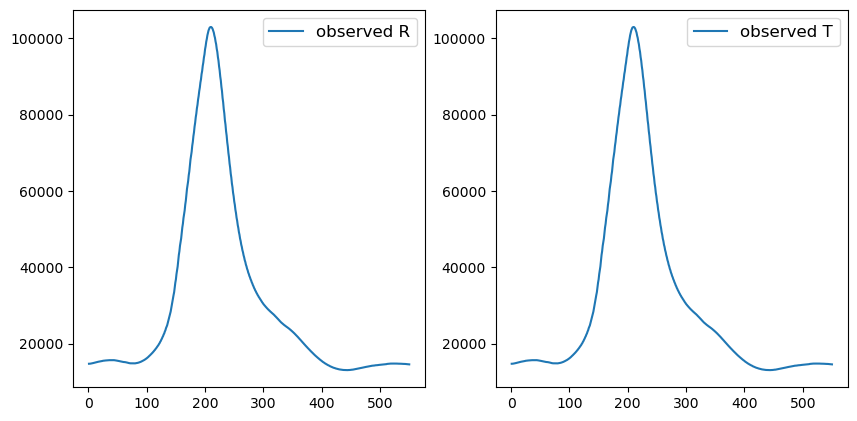

In [76]:
fig, axes = plt.subplots(1, 2)

#x = np.linspace(0, 55, 550)
x = np.arange(1, 551)
y = R_data_propane.iloc[10,1:]
y_label = ['observed R', 'observed T']

for ax in range(2):
    axes[ax].plot(x, y, label = y_label[ax])
    axes[ax].legend(fontsize=12)

fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

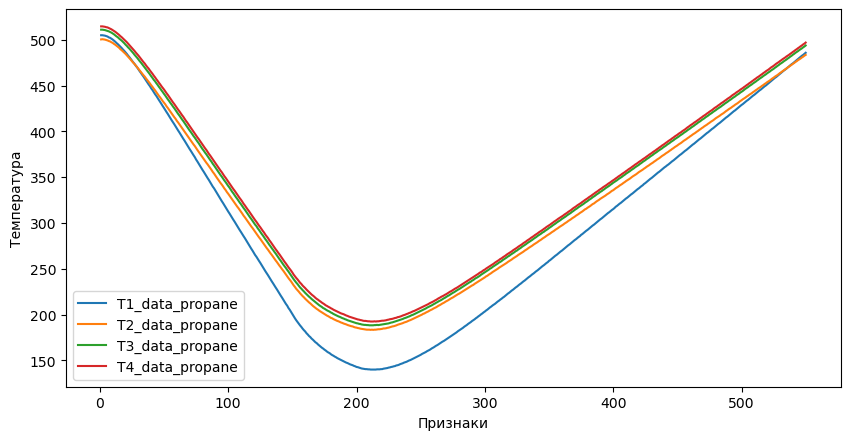

In [74]:
first_row_T1 = T1_data_propane.iloc[0, 1:]
first_row_T2 = T2_data_propane.iloc[0, 1:]
first_row_T3 = T3_data_propane.iloc[0, 1:]
first_row_T4 = T4_data_propane.iloc[0, 1:]

# создаем ось X от 1 до 550
x = np.arange(1, 551)

# строим график
fig, ax = plt.subplots()
ax.plot(x, first_row_T1.values, label='T1_data_propane')
ax.plot(x, first_row_T2.values, label='T2_data_propane')
ax.plot(x, first_row_T3.values, label='T3_data_propane')
ax.plot(x, first_row_T4.values, label='T4_data_propane')
ax.set_xlabel('Признаки')
ax.set_ylabel('Температура')
ax.legend()
plt.show()



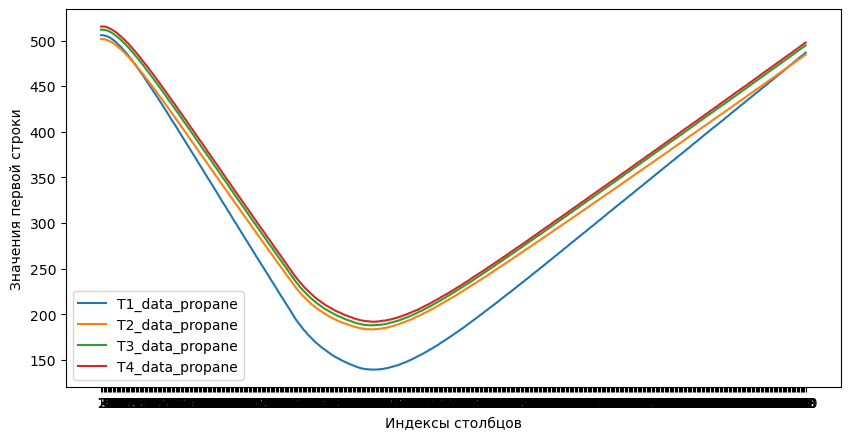

In [71]:
first_row_T1 = T1_data_h2.iloc[0, 1:]
first_row_T2 = T2_data_h2.iloc[0, 1:]
first_row_T3 = T3_data_h2.iloc[0, 1:]
first_row_T4 = T4_data_h2.iloc[0, 1:]

# создаем ось X от 1 до 550
x = np.arange(1, 551)

# строим график
fig, ax = plt.subplots()
ax.plot(x, first_row_T1.values, label='T1_data_h2')
ax.plot(x, first_row_T2.values, label='T2_data_h2')
ax.plot(x, first_row_T3.values, label='T3_data_h2')
ax.plot(x, first_row_T4.values, label='T4_data_h2')
ax.set_xlabel('Признаки')
ax.set_ylabel('Температура')
ax.legend()
plt.show()


In [72]:
first_row_T1.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '541', '542', '543', '544', '545', '546', '547', '548', '549', '550'],
      dtype='object', length=550)

In [53]:
R_data_propane.iloc[10,1:]

14695.51

In [84]:
R_data_propane.iloc[:,1:550]

,1,2,3,4,5,6,7,8,9,10,...,540,541,542,543,544,545,546,547,548,549
0,14786.84,14792.78,14828.40,14866.92,14915.41,14973.04,15010.73,15048.73,15080.79,15121.76,...,15010.88,14985.15,14975.94,14963.98,14935.74,14911.07,14899.50,14848.34,14820.94,14802.59
1,14752.13,14767.89,14828.70,14871.41,14942.97,15000.60,15071.58,15099.98,15157.79,15197.93,...,15018.12,14985.91,14967.25,14957.59,14927.67,14892.49,14863.26,14845.91,14812.72,14784.79
2,14811.20,14813.71,14841.64,14871.86,14903.23,14934.67,14977.00,15001.98,15044.24,15086.58,...,14888.15,14884.58,14881.15,14868.44,14862.35,14842.71,14819.57,14802.82,14784.18,14762.10
3,14658.30,14655.56,14693.99,14724.96,14766.52,14815.00,14848.49,14894.55,14914.49,14963.45,...,14882.52,14867.07,14861.89,14852.68,14833.80,14815.00,14791.03,14766.37,14731.13,14706.17
4,14635.55,14638.75,14676.03,14703.50,14742.93,14792.47,14819.64,14876.05,14914.95,14974.34,...,14712.41,14707.69,14683.95,14687.07,14675.27,14648.87,14635.25,14617.37,14583.36,14566.85
5,14565.40,14572.17,14609.68,14631.90,14685.09,14712.41,14761.19,14785.47,14834.34,14860.67,...,14467.73,14438.67,14441.26,14432.59,14428.25,14419.43,14405.13,14398.13,14379.27,14358.21
6,14379.35,14371.82,14396.84,14449.25,14497.17,14530.49,14578.87,14606.79,14662.26,14696.20,...,14541.14,14524.32,14528.20,14515.88,14498.54,14480.89,14472.60,14450.62,14432.51,14407.49
7,14392.66,14395.93,14420.72,14463.70,14492.07,14524.63,14567.08,14601.39,14641.49,14687.75,...,13926.67,13925.91,13911.93,13918.99,13903.49,13880.09,13864.06,13853.35,13826.30,13823.95
8,13914.89,13914.82,13950.68,14000.61,14041.49,14085.73,14121.22,14169.65,14193.14,14250.84,...,14561.60,14544.94,14550.95,14538.32,14523.87,14521.05,14506.90,14504.01,14485.00,14477.77
9,14515.58,14518.16,14549.73,14582.45,14594.39,14652.83,14694.60,14741.17,14763.63,14825.28,...,14805.11,14804.65,14783.95,14779.76,14758.15,14734.10,14710.73,14695.29,14672.76,14652.52


Text(0.5, 1.0, 'Crop Data for 1 cycle, sensor R1, concentration 30. 04.03.2019')

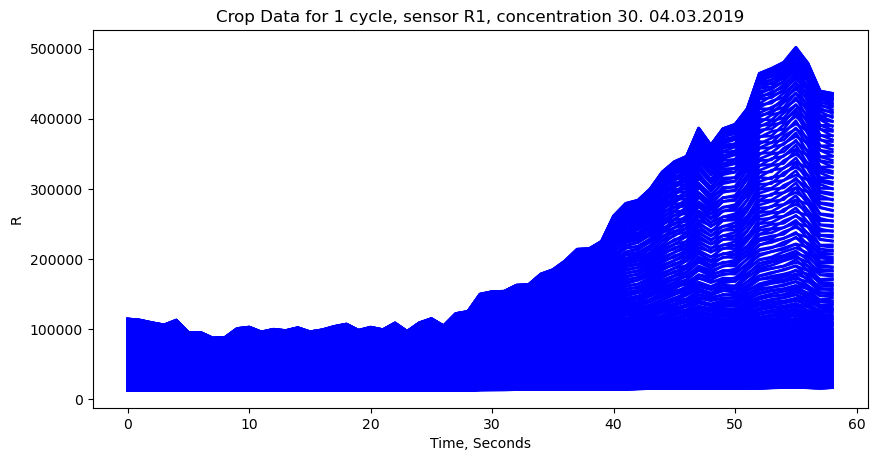

In [51]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100
plt.plot(np.array(R_data_propane.iloc[:,1:550]), label = 'R1 ', linewidth=2.0, color='blue')

plt.xlabel("Time, Seconds")
plt.ylabel("R")
plt.title("Crop Data for 1 cycle, sensor R1, concentration 30. 04.03.2019")


#plt.legend()
